1. Lab Session Time:
    - Thursday 7-8 pm EST
    
2. Project 
     - Proposal: https://spgi.app.box.com/file/518621933062
     - DDL: Second lab 
     - Schedule: https://spgi.app.box.com/file/694433734616
     - Presentation: https://thehub.spglobal.com/groups/data-science-academy/blog/2020/11/10/dsa-july-2020-cohort-showcase

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_style(style="darkgrid")

In [2]:
df = pd.read_csv('../data/fifa.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


## How does the distribution of players overall score differ from country to country?

In [4]:
len(df['Nationality'].unique())

164

### the data includes players from 164 different countries
### Select the top 10 countries, which has largest number of player, as the sample data

In [5]:
 df.groupby(['Nationality']).size().sort_values(ascending=False).index.values[:10]

array(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
       'Italy', 'Colombia', 'Japan', 'Netherlands'], dtype=object)

In [6]:
top_ten_nations = df.groupby(['Nationality']).size().sort_values(ascending=False).index.values[:10]

Text(0.5, 0.98, 'Histogram for Overall Score (10 Countries)')

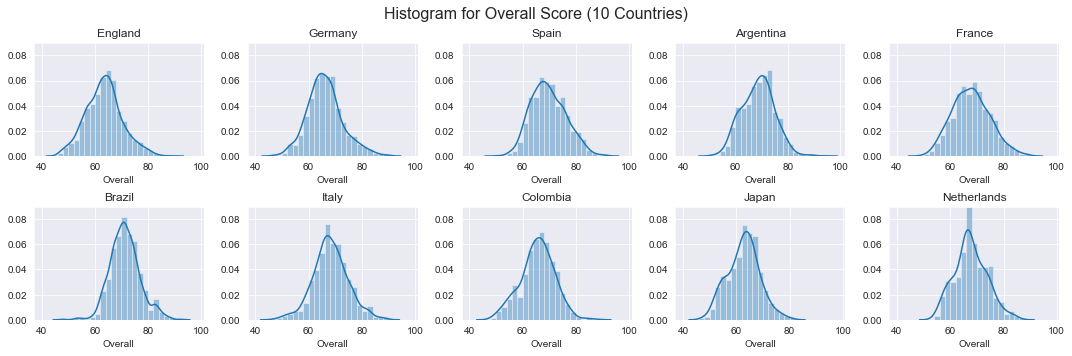

In [7]:
fig, axes = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    filtered_nation = df[df['Nationality'] == top_ten_nations[i]]
    ax = axes[i//5, i%5]
    sns.distplot(filtered_nation['Overall'], bins=range(40, 100, 2), ax=ax)
    # set all subplots with same y range to make them more comparison
    ax.set_ylim(0, 0.09)
    ax.set_title(top_ten_nations[i])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Histogram for Overall Score (10 Countries)', fontsize=16)

In [8]:
top_five_nations = df.groupby(['Nationality']).size().sort_values(ascending=False).head(5).index.values
data_top_five_nations = df[df['Nationality'].isin(top_five_nations)]

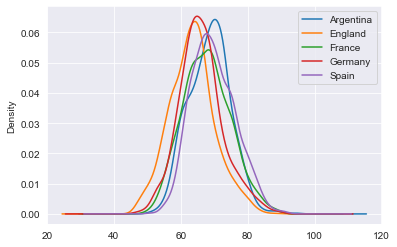

In [9]:
data_top_five_nations.groupby(['Nationality'])['Overall'].plot(kind = 'density')
plt.legend()

- The distribution of players overall score for each of the top 10 countries has a bell shape.
- The density curve of France is flatter than that of Brazil, suggesting a larger variance.
- The distribution from Spain is left (positive) skewed. On the contrary, the distribution from England and Argentina are right (negative) skewed.
- From the second graph, we can see that the density curve of Spain is to the right of the density curve of England, suggesting that Spain has better players than England.

## How does the distribution of players potential score differ from country to country?

Text(0.5, 0.98, 'Histogram for Potential Score (10 Countries)')

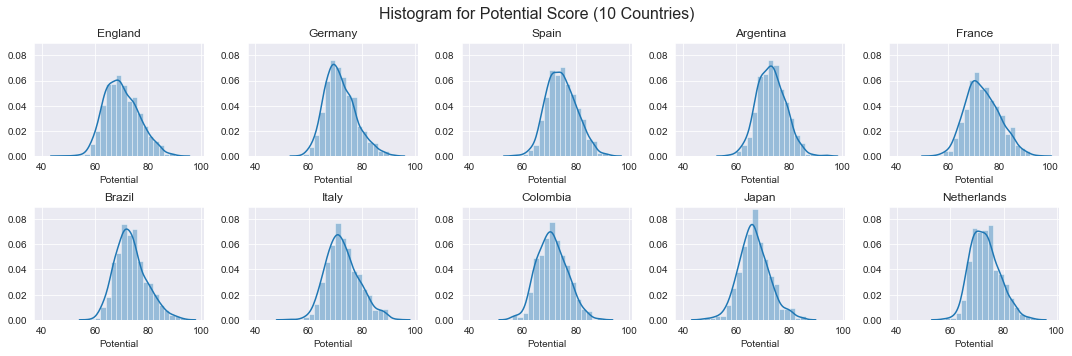

In [10]:
fig, axes = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    filtered_nation = df[df['Nationality'] == top_ten_nations[i]]
    ax = axes[i//5, i%5]
    sns.distplot(filtered_nation['Potential'], bins=range(40, 100, 2), ax=ax)
    # set all subplots with same y range to make them more comparison
    ax.set_ylim(0, 0.09)
    ax.set_title(top_ten_nations[i])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Histogram for Potential Score (10 Countries)', fontsize=16)

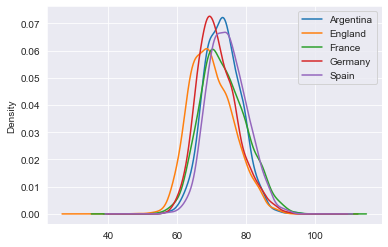

In [11]:
data_top_five_nations.groupby(['Nationality'])['Potential'].plot(kind = 'density')
plt.legend()

- All distributions have the bell shape.
- Most distributions are positive skewed.
- Players from Argentina, Spain and France tend to have more potential then players from England and Germany.

## How do the wages of players compare across top clubs?
### Since the data has player from 652 different clubs, select the top clubs depending on the sum of the overall scores.

In [12]:
len(df['Club'].astype(str).unique())

652

In [13]:
# Define the top clubs as the top 10 clubs that have highest total player overall score
top_ten_clubs = df.groupby(
    ['Club']
)['Overall'].sum().sort_values(
    ascending=False
).head(10).index.values

In [14]:
top_ten_clubs

array(['Real Madrid', 'FC Barcelona', 'Manchester United', 'Chelsea',
       'Manchester City', 'Tottenham Hotspur', 'Liverpool',
       'Borussia Dortmund', 'Arsenal', 'Atlético Madrid'], dtype=object)

In [15]:
df['Wage'].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

In [16]:
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [17]:
def convert_str_value_to_numeric(str_value):
    if str_value in ['NaN', 'nan', np.nan]:
        return np.nan
    else:
        if str_value.endswith('K'):
            multiplier = 1
        elif str_value.endswith('M'):
            multiplier = 1000
        else:
            multiplier = 1
        re_pattern = re.compile('[^0-9\.\-]')
        return float(re.sub(re_pattern, '', str_value)) * multiplier

In [18]:
df.dtypes

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object

In [19]:
df['Value_trans'] = df['Value'].apply(convert_str_value_to_numeric)
df['Wage_trans'] = df['Wage'].apply(convert_str_value_to_numeric)

In [20]:
data_club = df[df['Club'].isin(top_ten_clubs)]
data_club.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value_trans,Wage_trans
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,110500.0,565.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000.0,260.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,102000.0,355.0


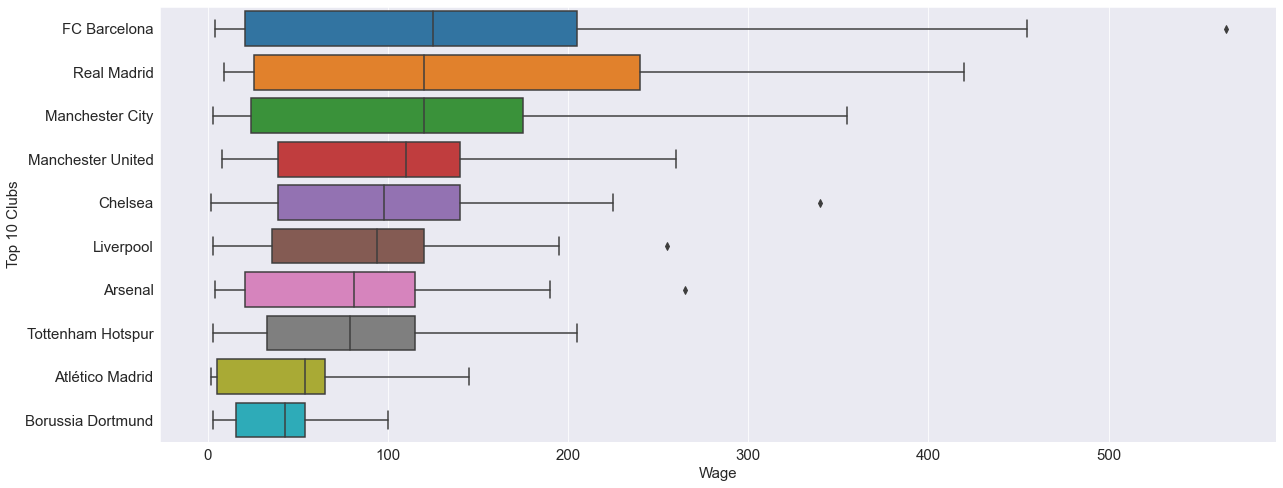

In [21]:
data_club = df[df['Club'].isin(top_ten_clubs)]
plt.figure(figsize=(20,8))
sns.boxplot(y='Club',
            x='Wage_trans',
            data=data_club, 
            orient="h",
            order=data_club.groupby(
                ['Club']
            )['Wage_trans'].median().sort_values(
                ascending=False
            ).index)
plt.xlabel('Wage', fontsize=15)
plt.ylabel('Top 10 Clubs', fontsize=15)
plt.tick_params(labelsize=15)

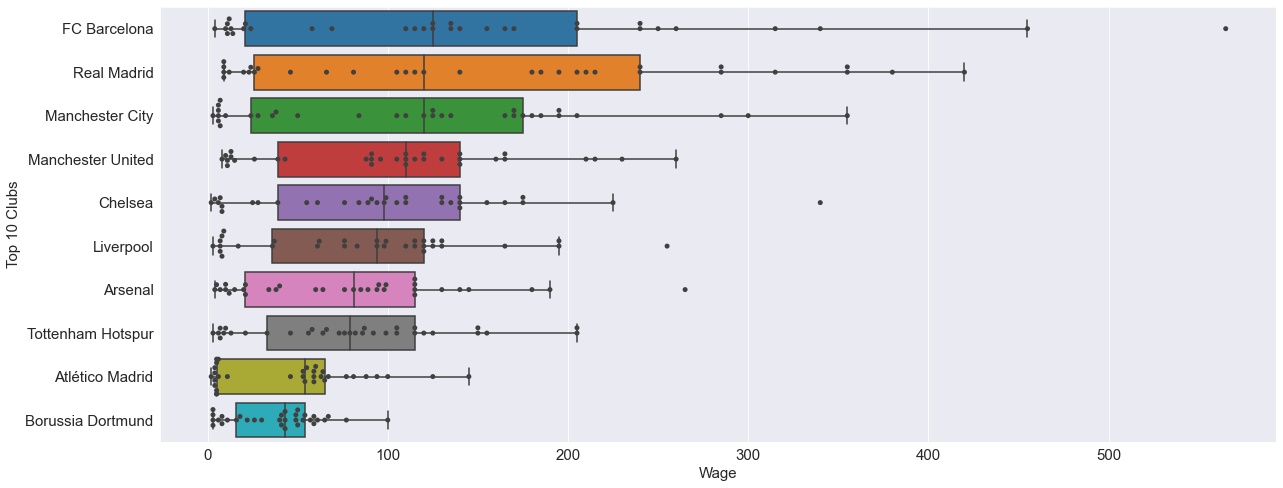

In [22]:

data_club = df[df['Club'].isin(top_ten_clubs)]
plt.figure(figsize=(20,8))
sns.boxplot(y="Club", x="Wage_trans", data=data_club, order=data_club.groupby(
                ['Club']
            )['Wage_trans'].median().sort_values(
                ascending=False
            ).index, showfliers = False, orient="h")
sns.swarmplot(y="Club", x="Wage_trans", data=data_club, order=data_club.groupby(
                ['Club']
            )['Wage_trans'].median().sort_values(
                ascending=False
            ).index, color=".25", orient="h")

plt.xlabel('Wage', fontsize=15)
plt.ylabel('Top 10 Clubs', fontsize=15)
plt.tick_params(labelsize=15)


Q3 + 1.5 * IQR / max(Q1 - 1.5 * IQR, min(data))

- The median wages of players from the top 10 clubs are quite different. The boxes have been sorted depending on the median value of the wage. FC Barcelona has the highest median wage, on the contrary, Borussia Dortmund has the smallest median wage.
- The box for Real Madrid is the longest one and the box for Borussia Dortmund is the shortest one, which means that the wage difference at Real Madrid is larger than that at Borussia Dortmund.
Among all players from the top 10 clubs, the player with the highest wage is from FC Barcelona.
- In some clubs, like FC Barcelona, Chelsea, Liverpool and Arsenal, one player has a much larger wage than all the other players from the same club.
- For most clubs, the distribution of players’ wage is positive skewed, especially Atlético Madrid.



## How do market values of players compare across top clubs?

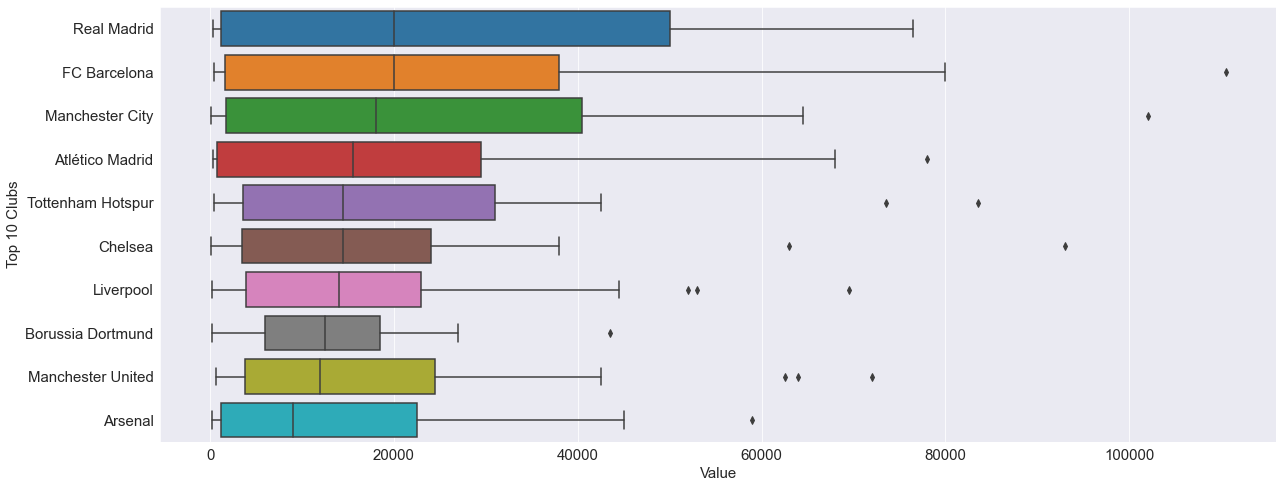

In [23]:
plt.figure(figsize=(20, 8))
sns.boxplot(y='Club',
            x='Value_trans',
            data=data_club, 
            orient="h",
            order=data_club.groupby(['Club'])['Value_trans'].median().sort_values(ascending=False).index)
plt.xlabel('Value', fontsize=15)
plt.ylabel('Top 10 Clubs', fontsize=15)
plt.tick_params(labelsize=15)

- The players from Real Madrid has the largest median market value, followed by FC Barcelona.
- Most the clubs have a few players with much higher market value than other players from the same club.
For some clubs, like Real Madrid, Manchester City and Arsenal, the distribution of players’ market value are positive skewed.
- The box for Real Madrid is the longest one and the box for Borussia Dortmund is the shortest one, which means that the difference of market value of Real Madrid is larger than that of Borussia Dortmund.

## How are Overall and Potential scores related?

Text(0, 0.5, 'Potential Score')

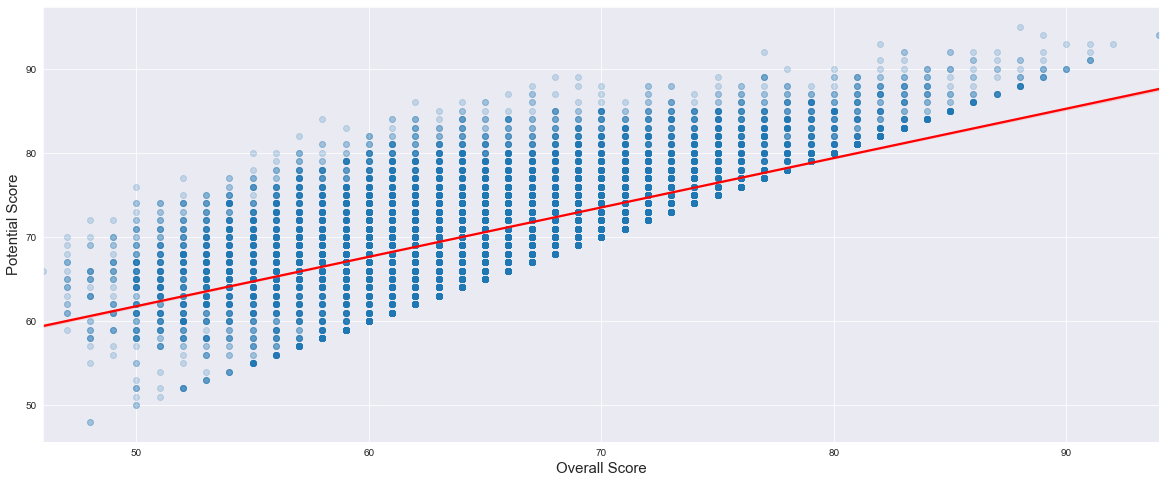

In [24]:
plt.figure(figsize=(20,8))
sns.regplot(x="Overall", y="Potential", data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.xlabel('Overall Score', fontsize=15)
plt.ylabel('Potential Score', fontsize=15)

- The players with high potential score has a high overall score.
- For players with the same overall score, their potential score could be quite different.

## Do player values differ by players’ age? And do wages differ by players’ age?

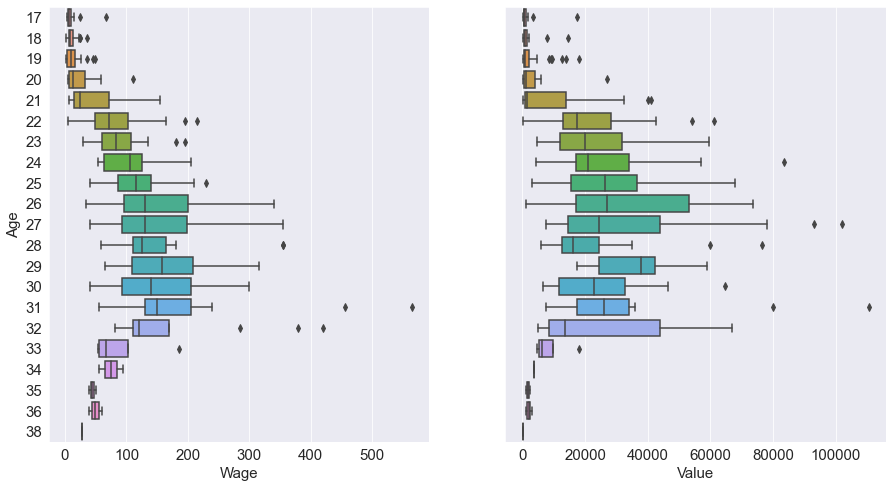

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,8), sharey=True)
sns.boxplot(y='Age',x='Wage_trans',data=data_club, orient='h', ax=ax[0])
ax[0].set_ylabel('Age', fontsize=15)
ax[0].set_xlabel('Wage', fontsize=15)
ax[0].tick_params(labelsize=15)

sns.boxplot(y='Age',x='Value_trans',data=data_club, orient='h', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Value', fontsize=15)
ax[1].tick_params(labelsize=15)

- Both the distribution of Wage and Value differ by age.
- Players with ages 26-31 tend to have higher wages compared to players from other age groups.
- Players' media value shows a great drop after 31.

## Does a player's value depend on his position?

In [26]:
data_position = df.dropna(axis=0, subset=['Position']).copy()

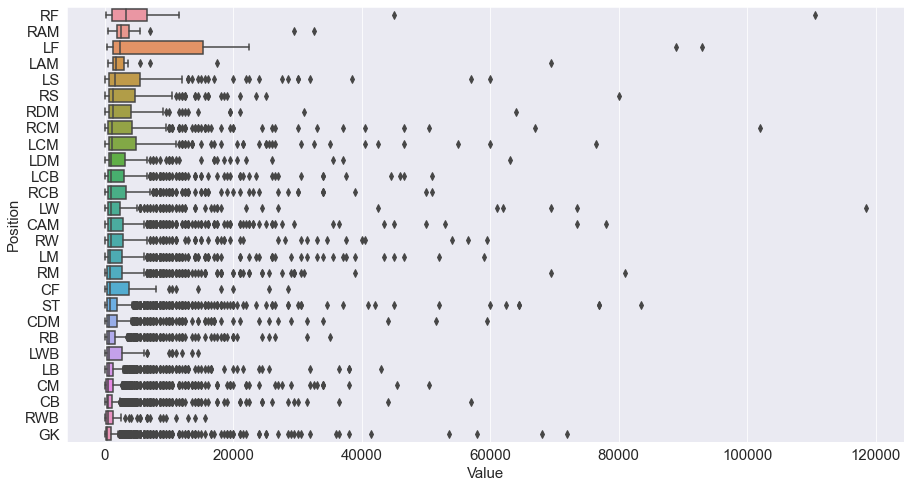

In [27]:
ax = plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Value_trans',
                 y='Position',
                 data=data_position, 
                 order=data_position.groupby(
                     ['Position'])['Value_trans'].median().sort_values(ascending=False).index)
ax.set_ylabel('Position', fontsize=15)
ax.set_xlabel('Value', fontsize=15)
ax.tick_params(labelsize=15)

- The boxplot is sorted by the median value of the players from that position. RF has the highest median value and GK has the lowest median value. 
- The distribution of player's values are positively skewed.

### Lots of outliers could be observed from the previous boxplot. (defined as outside of fixed factor of the IQR), and the distribution is heavy-tailed. Under this condition, transformations could be applied. One commonly used transformation is the log transformation.

In [28]:
data_position['Value_trans'].min()

0.0

In [29]:
data_position['log_value'] = np.log(data_position['Value_trans'] + 1)

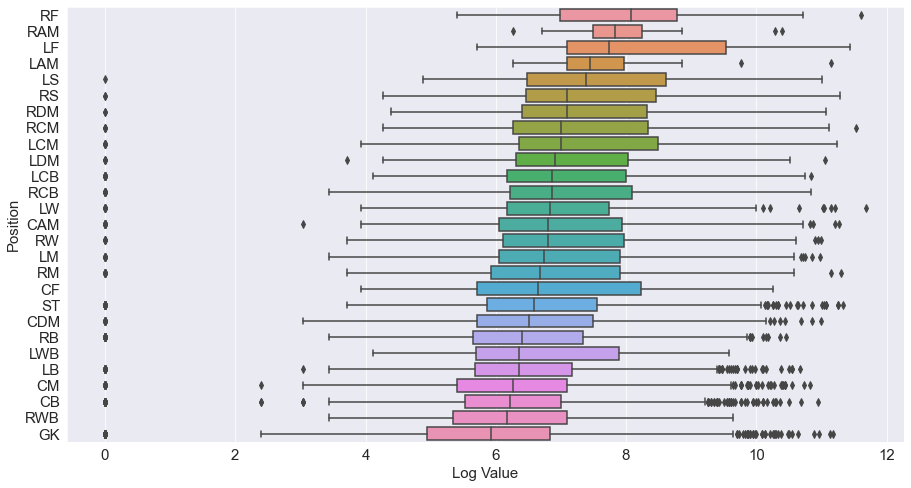

In [30]:
ax = plt.figure(figsize=(15,8))
ax = sns.boxplot(x='log_value',
                 y='Position',
                 data=data_position, 
                 order=data_position.groupby(
                     ['Position'])['Value_trans'].median().sort_values(ascending=False).index)
ax.set_ylabel('Position', fontsize=15)
ax.set_xlabel('Log Value', fontsize=15)
ax.tick_params(labelsize=15)

- After applying log transformation, redraw the boxplot. There are fewer outliers. In the meantime, the distribution of the data is clearer to observe.

## Who's the best player per position?

In [31]:
idx = data_position.groupby('Position')['Overall'].transform(max) == data_position['Overall']
data_position.loc[idx, ['Name','Position']].head(10)

,Name,Position
0,L. Messi,RF
1,Cristiano Ronaldo,ST
2,Neymar Jr,LW
3,De Gea,GK
4,K. De Bruyne,RCM
5,E. Hazard,LF
6,L. Modrić,RCM
7,L. Suárez,RS
8,Sergio Ramos,RCB
11,T. Kroos,LCM


## Do left footed players have an advantage over right footed players?

In [32]:
col = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','Preferred Foot']

In [33]:
skill_df = df.dropna(axis=0, subset=col)

In [34]:
skill_df = pd.melt(skill_df[col], id_vars=['Preferred Foot'])
skill_df['value'] = skill_df['value'].astype('float')

In [35]:
skill_df.head(2)

,Preferred Foot,variable,value
0,Left,Crossing,84.0
1,Right,Crossing,84.0


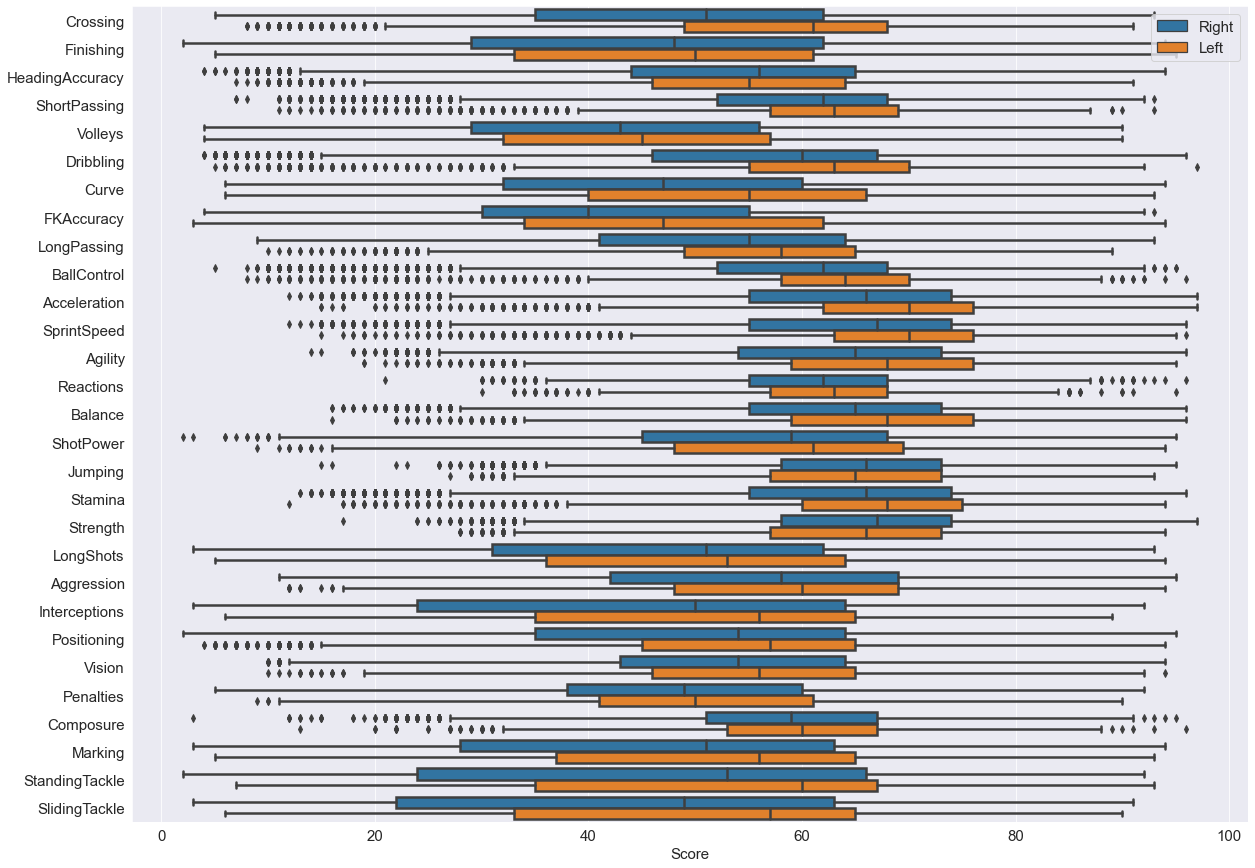

In [36]:
plt.figure(figsize=(20,15))
sns.boxplot(y='variable', 
            x='value', 
            hue="Preferred Foot", 
            data=skill_df,
            orient="h", 
            linewidth=2.5, 
            hue_order=['Right', 'Left'])
plt.tick_params(labelsize=15)
plt.ylabel(None)
plt.xlabel('Score', fontsize=15)
plt.legend(fontsize=15, loc=1)

- Left footed players have an advantage over right footed players in most of the abilities.
- In the meantime, for most variables, the deviations of values of the left footed players are smaller than those of the right footed players.